In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Dataset

dataset = pd.read_excel("E-com_Data.xlsx")

In [3]:
df = dataset.copy()

In [4]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [5]:
print("No of rows    :", df.shape[0])
print("No of coulmns :",df.shape[1])

No of rows    : 537979
No of coulmns : 12


In [6]:
df.nunique()


CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [7]:
df.nunique(axis=0,dropna=False)

CustomerID            4350
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         2
Reason of return         3
Sold as set              1
dtype: int64

# Misssing values

In [8]:
(df.isnull().sum() / len(df))*100

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64


* CustomerID --- Around 25 % . But its a key feature and cannnot be ignored. All records having null values in CustomerID can be imputed with some random id / those records alone can be dropped
* Cancelled status , Reason of return and Sold as set - Around 100 % percent data missing . 
* Cancelled status , Reason of return and Sold as set features can be removed and new dataframe without these 3 features can be taken for analysis


In [9]:
df.shape

(537979, 12)

In [10]:
# Dataset having null values in CustomerID
df[pd.isnull(df['CustomerID'])]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
2925,NaN,14045,395775,2017-10-21,-45,10:14:00,62.0,-2790.0,Location 1,NaN,NaN,NaN
2926,NaN,15734,396260,2017-10-18,-6,12:02:00,261.0,-1566.0,Location 1,1.0,NaN,NaN
2927,NaN,14615,382089,2017-06-21,-9,13:09:00,12.0,-108.0,Location 1,NaN,NaN,NaN
2928,NaN,14619,384585,2017-07-09,1,16:26:00,99.0,99.0,Location 1,NaN,NaN,NaN
2929,NaN,14619,390367,2017-09-12,1,12:17:00,118.0,118.0,Location 1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537974,NaN,85194L,372313,2017-03-23,6,09:27:00,198.0,1188.0,Location 8,NaN,NaN,NaN
537975,NaN,14693,367605,2017-02-06,2,14:25:00,761.0,1522.0,Location 8,NaN,NaN,NaN
537976,NaN,14693,368246,2017-02-06,3,10:40:00,761.0,2283.0,Location 8,NaN,NaN,NaN
537977,NaN,85194L,366891,2017-01-29,15,17:05:00,198.0,2970.0,Location 8,NaN,NaN,NaN


In [11]:
# Drop records (rows) having null values in CustomerID

df.dropna(subset=['CustomerID'],inplace=True)

In [15]:
# Drop the columns Cancelled status , Reason of return and Sold as set

df = df.drop(columns=["Cancelled_status","Reason of return","Sold as set"],axis=1)

In [17]:
df.isnull().sum()

CustomerID           0
Item Code            0
InvoieNo             0
Date of purchase     0
Quantity             0
Time                 0
price per Unit       0
Price                0
Shipping Location    0
dtype: int64

In [18]:
# All null values are dropped

In [19]:
# Handling Duplicate data

In [20]:
df.head(10)

# Observations
# student_id - can be present more than once because same student would have visited multiple times
# Course Code - can be present more than once since its a product code 
# Invoice No - Should be unique and no duplicate is possible / allowed since new invoice number is generated everytime 
# Date of Purchase - Can occur more than once because multiple customers visit on a day
# Time, course price , Price, Shipping Location - Duplicate allowed

# Conclusion : Except InvoiceNo all other features can be present multiple times. 
# If any duplicates in invoiceNo - Those records need to be replaced with correct InvoiceNo or shoudl be dropped
# We decide to drop the records having duplcate InvoiceNo 

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1


In [21]:
df.loc[df.duplicated(),:]

# 8 records found with duplicate InvoiceNo

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36


In [22]:
# Drop records with duplicate InvoiceNo

df = df.drop_duplicates(ignore_index=True)
df.shape

(404181, 9)

# EDA

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404181 entries, 0 to 404180
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoieNo           404181 non-null  int64         
 3   Date of purchase   404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.8+ MB


In [24]:
df.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price
count,404181.000000,404181.000000,404181.000000,404181.000000,404181.000000
mean,2181.897630,385648.273397,11.478669,341.450009,2474.139920
std,1252.681271,13107.396221,29.489919,427.242005,4891.388347
min,2.000000,361429.000000,-152.000000,2.000000,-10152.000000
25%,1207.000000,374194.000000,2.000000,158.000000,555.000000
50%,2078.000000,386937.000000,5.000000,238.000000,1572.000000
75%,3291.000000,397130.000000,12.000000,407.000000,2492.000000
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000


In [25]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


# Objective:
## Create a model to segment customers based on RFM (Recency, Frequency and Monetory) values
* Recency - When did he purchase last / How many days its been the customer has purchased an item? Should be less 
* Frequency - How often he buys / No of purchases by customer. Shoudl be high 
* Monetory - For how much amount the customer has purchased? Should be high 
* How to calculate these scores?
* For every customer, calculate the following
* Recency =  Latest date(Today's date) - Date of purchase . Latest date = max(Date of Purchase) + 1 day
* Frequency = No of InvoicNo
* Monetory = Sum of Price
## NOTE: Both Recency and Frequency are calculated based on Date of purchase. 

In [26]:
df['Date_Recency'] = df['Date of purchase']
df['Date_Frequency'] = df['Date_Recency']

In [27]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Date_Recency,Date_Frequency
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,2017-10-12,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,2017-08-22,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,2017-10-10,2017-10-10


In [28]:
from datetime import timedelta

# timedelta - used for calculating differences in dates and can also be used for date manipulations in Python

In [29]:
# Creating a RFM dataframe for every unique customer
Latest_Date = pd.to_datetime(df['Date of purchase'].max()) + timedelta(days=1)
Latest_Date

Timestamp('2017-12-20 00:00:00')

In [31]:
RFM_table = df.groupby('CustomerID').agg({'Date_Recency': lambda x : (Latest_Date - x.max()).days,
                                            'Date_Frequency': lambda x : x.count(),
                                            'Price' : lambda x : x.sum()})

In [32]:
RFM_table

,Date_Recency,Date_Frequency,Price
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,84,151822.0
...,...,...,...
4368.0,278,10,20480.0
4369.0,181,7,10774.0
4370.0,9,13,24962.0


In [34]:
RFM_table.rename(columns={'Date_Recency':'Recency','Date_Frequency':'Frequency','Price':'Monetory'},inplace=True)

In [35]:
RFM_table.reset_index(inplace=True)

In [36]:
RFM_table.head()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0


In [37]:
RFM_table.describe()

,CustomerID,Recency,Frequency,Monetory
count,4349.000000,4349.000000,4349.000000,4.349000e+03
mean,2187.093355,93.299379,92.936537,2.299380e+05
std,1261.544319,100.701315,232.086935,8.572589e+05
min,2.000000,1.000000,1.000000,-5.037200e+04
25%,1095.000000,18.000000,17.000000,3.814800e+04
50%,2186.000000,51.000000,42.000000,8.365500e+04
75%,3279.000000,144.000000,101.000000,2.056120e+05
max,4372.000000,381.000000,7970.000000,3.553619e+07


In [38]:
# split the data into four segments using quantile method
quantiles = RFM_table.quantile(q=[0.25,0.50,0.75])
print(quantiles)
quantiles = quantiles.to_dict()
quantiles


# Recency 
# Segmnent 1 - Students who - visited in the recent 18 days  (25th percentile)
# Segmnent 2 - Students who visited in 19th to 51 days (50th percentile)
# Segmnent 3 - Students who visited in 52 to 144 days (75th percentile)
# Segmnent 4 - Students who visited 144 days ago 

# Frequency and Monetory 
# Segmnent 4 - Students who purchased less than than 17 times / spent less than 6012 (25th percentile)
# Segmnent 3 - Students who purchased 18 to 41 times / spent from 6012 to 14706 (50th percentile)
# Segmnent 2 - Students who purchased 42 to 100 time / spent from  14706 to 33568 (75th percentile)
# Segmnent 1 - Students who purchased more than 101 times / spent more than 33568




      CustomerID  Recency  Frequency  Monetory
0.25      1095.0     18.0       17.0   38148.0
0.50      2186.0     51.0       42.0   83655.0
0.75      3279.0    144.0      101.0  205612.0


{'CustomerID': {0.25: 1095.0, 0.5: 2186.0, 0.75: 3279.0},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [39]:
# Create own function to define R, F and M Segment

def RScoring(x,p,d):
    if x<= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else :
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75] :
        return 2
    else :
        return 1

In [40]:
RFM_table['R'] = RFM_table['Recency'].apply(RScoring, args = ('Recency', quantiles,))
RFM_table['F'] = RFM_table['Frequency'].apply(FnMScoring, args = ('Frequency', quantiles,))
RFM_table['M'] = RFM_table['Monetory'].apply(FnMScoring, args = ('Monetory', quantiles,))

In [41]:
RFM_table.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2


# Data Visualization

<AxesSubplot:ylabel='M'>

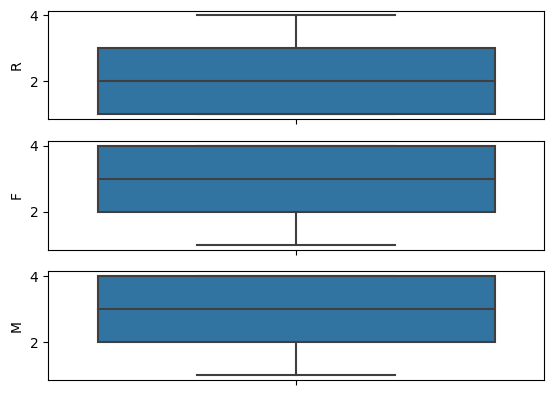

In [42]:
# Check for outliers present in Recency , Frequency and Monetory
plt.subplot(3,1,1)
sns.boxplot(y='R',data=RFM_table)
plt.subplot(3,1,2)
sns.boxplot(y='F',data=RFM_table)
plt.subplot(3,1,3)

sns.boxplot(y='M',data=RFM_table)


## Histogram

(array([1087.,    0.,    0., 1087.,    0.,    0., 1087.,    0.,    0.,
        1088.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

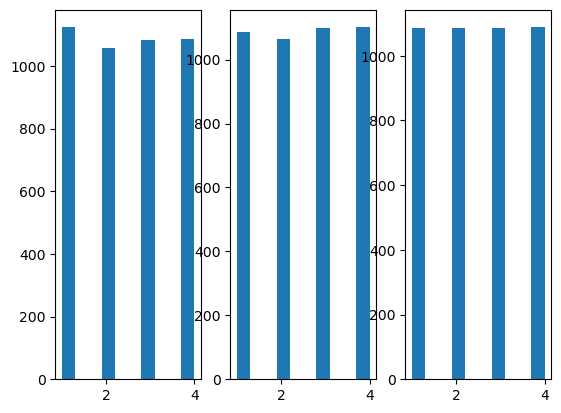

In [43]:
plt.subplot(1,3,1)
plt.hist(RFM_table['R'])
plt.subplot(1,3,2)
plt.hist(RFM_table['F'])
plt.subplot(1,3,3)
plt.hist(RFM_table['M'])

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'Frequency'}>],
       [<AxesSubplot:title={'center':'Monetory'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'F'}>],
       [<AxesSubplot:title={'center':'M'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

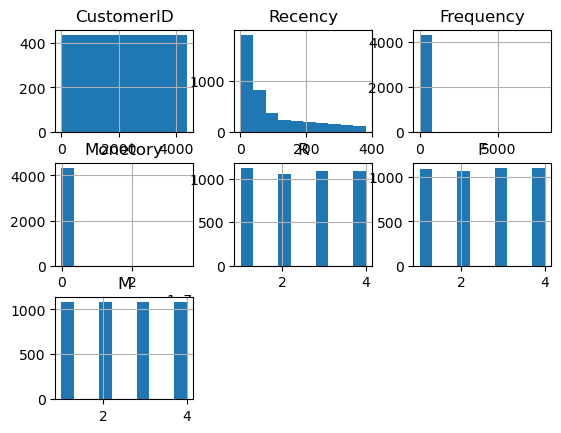

In [44]:
RFM_table.hist()

## Box Plot

<AxesSubplot:ylabel='M'>

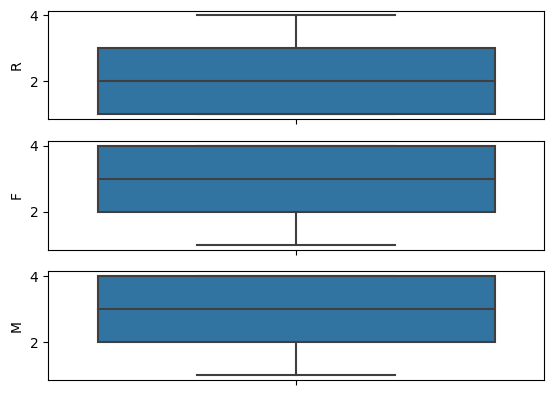

In [45]:
# Check for outliers present in Recency , Frequency and Monetory
plt.subplot(3,1,1)
sns.boxplot(y='R',data=RFM_table)
plt.subplot(3,1,2)
sns.boxplot(y='F',data=RFM_table)
plt.subplot(3,1,3)

sns.boxplot(y='M',data=RFM_table)


In [46]:
# No Outliers are present
# Normalizer Scaler can be used for feature scaling
# Customer id to be removed before scaling

from sklearn.preprocessing import Normalizer
unscaled_data = RFM_table.iloc[:,[4,5,6]]
#print(unscaled_data)

norm_scaler = Normalizer()

scaled_data = norm_scaler.fit_transform(unscaled_data)

scaled_data

array([[0.57735027, 0.57735027, 0.57735027],
       [0.6882472 , 0.6882472 , 0.22941573],
       [0.57735027, 0.57735027, 0.57735027],
       ...,
       [0.17407766, 0.69631062, 0.69631062],
       [0.57735027, 0.57735027, 0.57735027],
       [0.66666667, 0.66666667, 0.33333333]])

In [47]:
scaled_data = pd.DataFrame(scaled_data,index=RFM_table.index,columns=unscaled_data.columns)
scaled_data

,R,F,M
0,0.577350,0.577350,0.577350
1,0.688247,0.688247,0.229416
2,0.577350,0.577350,0.577350
3,0.624695,0.624695,0.468521
4,0.577350,0.577350,0.577350
...,...,...,...
4344,0.577350,0.577350,0.577350
4345,0.577350,0.577350,0.577350
4346,0.174078,0.696311,0.696311
4347,0.577350,0.577350,0.577350


In [48]:
RFM_table.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2


In [49]:
df_new = RFM_table.iloc[:,4:]
df_new.head()

,R,F,M
0,1,1,1
1,3,3,1
2,2,2,2
3,4,4,3
4,2,2,2


# K Means Clustering Model 


In [50]:
from sklearn.cluster import KMeans

wcss = {}

for k in range(1,15):
    km = KMeans(n_clusters = k, init='k-means++', max_iter=300)
    km = km.fit(scaled_data)
    wcss[k] = km.inertia_
    
    

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [51]:
wcss

{1: 265.4504037501194,
 2: 153.54893769670778,
 3: 106.41431068622204,
 4: 79.44515176218711,
 5: 62.09100894062787,
 6: 50.11128116778773,
 7: 44.961993844134845,
 8: 35.90778033556635,
 9: 30.995732352176354,
 10: 27.986442101416348,
 11: 24.80540965496251,
 12: 22.65145679661993,
 13: 19.677149883463738,
 14: 17.638610916244684}

## Visualisation for getting elbow method (to find the actual k value)


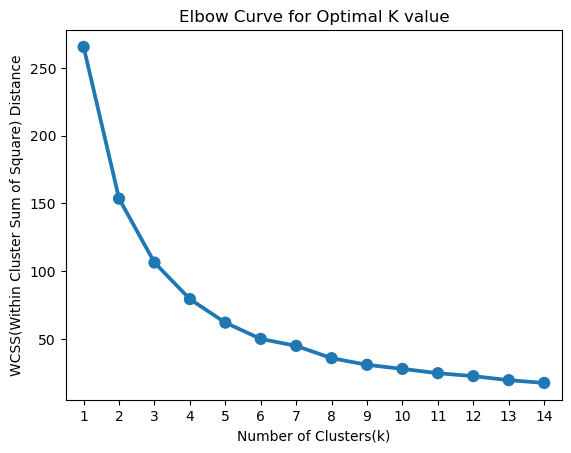

In [52]:

sns.pointplot(x = list(wcss.keys()),
             y = list(wcss.values()))
plt.xlabel("Number of Clusters(k)")
plt.ylabel("WCSS(Within Cluster Sum of Square) Distance")
plt.title("Elbow Curve for Optimal K value")
plt.show()

### From the above Elbow curve its noticed that the optimum value for k =4

### Visualisation of silhouette score for various cluster values (to find the actual k value)


In [53]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [54]:
X = scaled_data.values
print(X)
print(len(X))

[[0.57735027 0.57735027 0.57735027]
 [0.6882472  0.6882472  0.22941573]
 [0.57735027 0.57735027 0.57735027]
 ...
 [0.17407766 0.69631062 0.69631062]
 [0.57735027 0.57735027 0.57735027]
 [0.66666667 0.66666667 0.33333333]]
4349


For n_clusters = 2 The average silhouette_score is : 0.4139887152945321
For n_clusters = 3 The average silhouette_score is : 0.43155294005511824
For n_clusters = 4 The average silhouette_score is : 0.4662640481439729
For n_clusters = 5 The average silhouette_score is : 0.4991857397298299
For n_clusters = 6 The average silhouette_score is : 0.5138834033214236
For n_clusters = 7 The average silhouette_score is : 0.5469504737034673
For n_clusters = 8 The average silhouette_score is : 0.5634949894960259
For n_clusters = 9 The average silhouette_score is : 0.5972664790516181
For n_clusters = 10 The average silhouette_score is : 0.6291692226902448
For n_clusters = 11 The average silhouette_score is : 0.6266439197377588


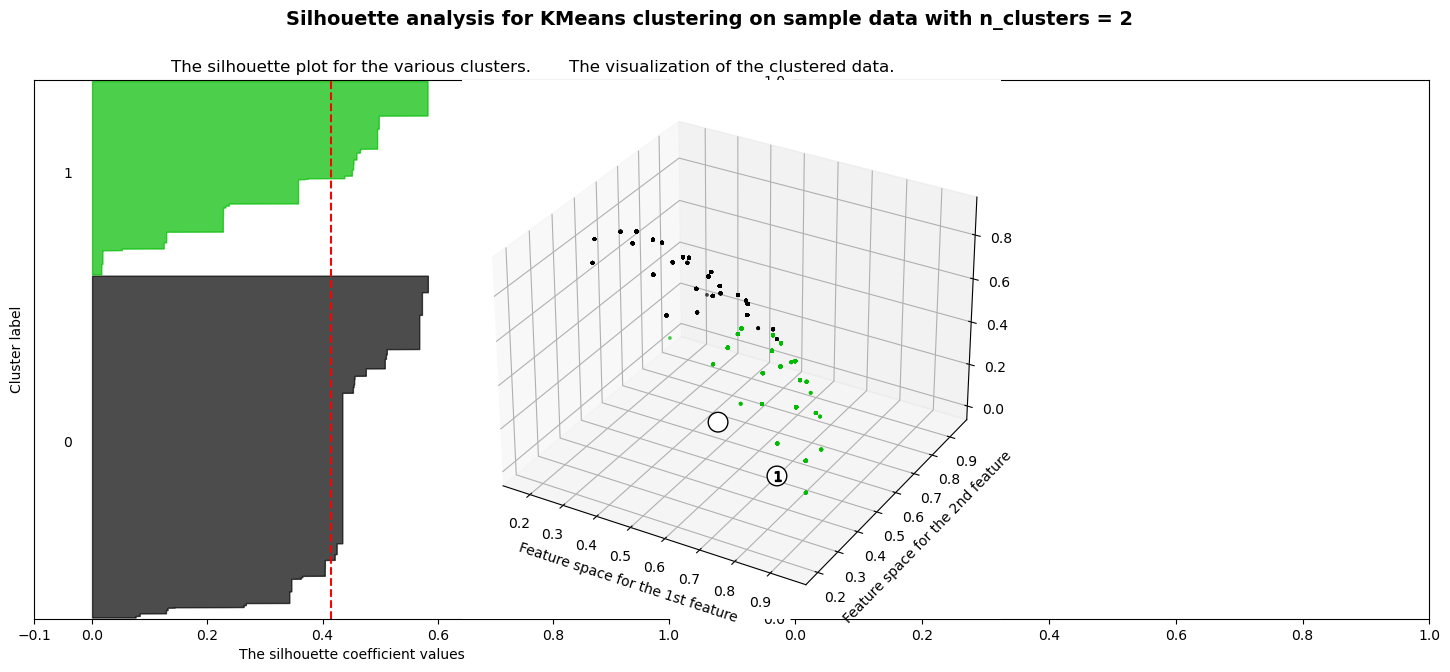

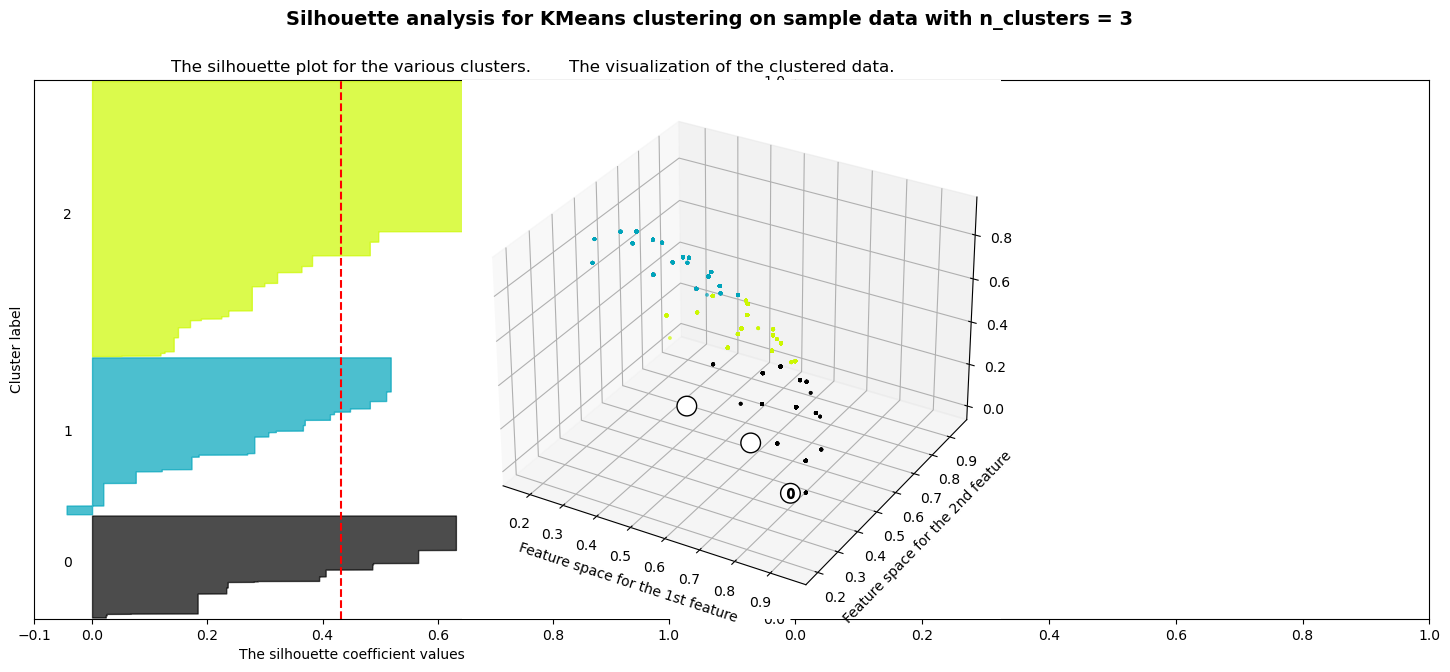

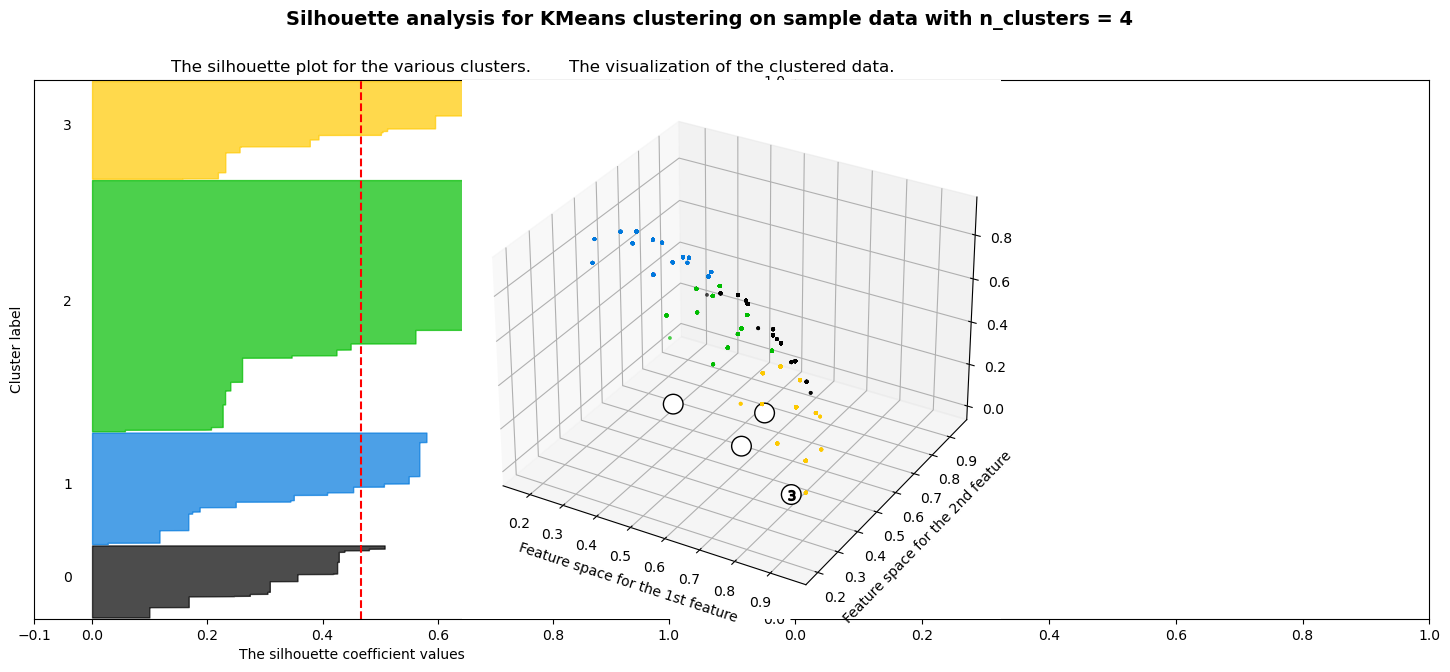

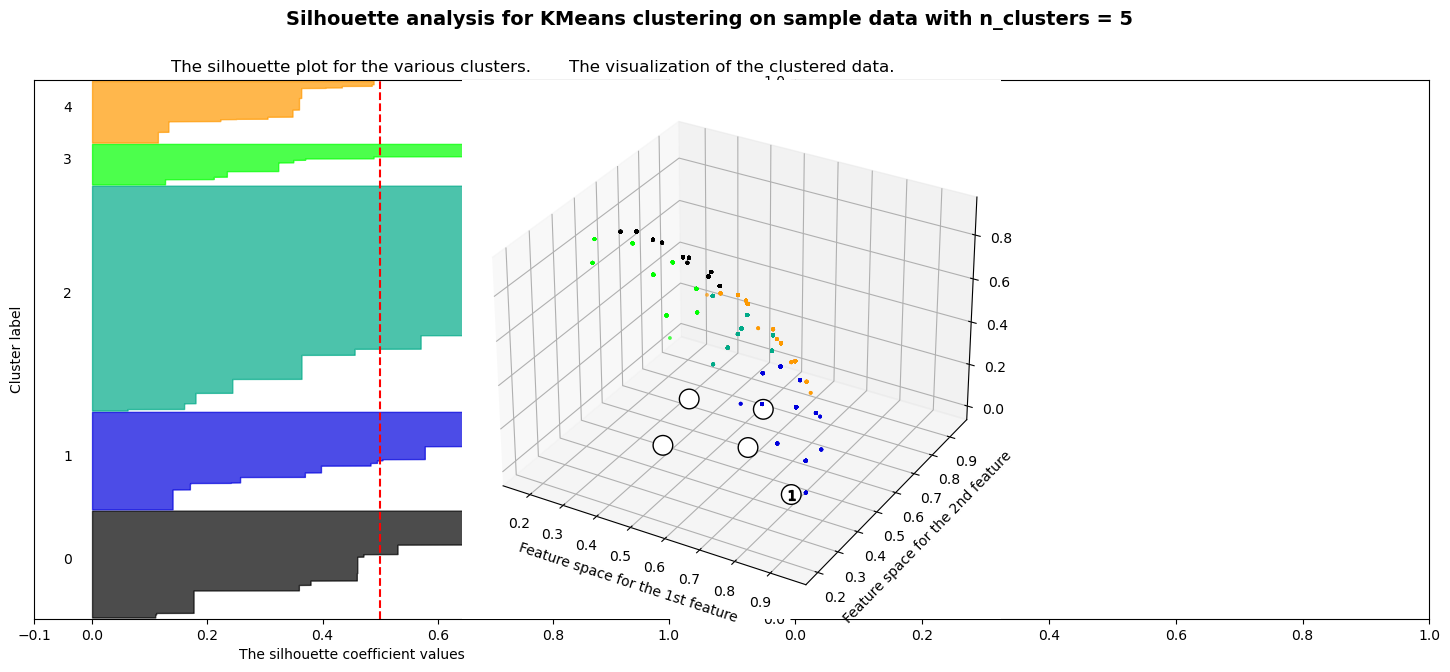

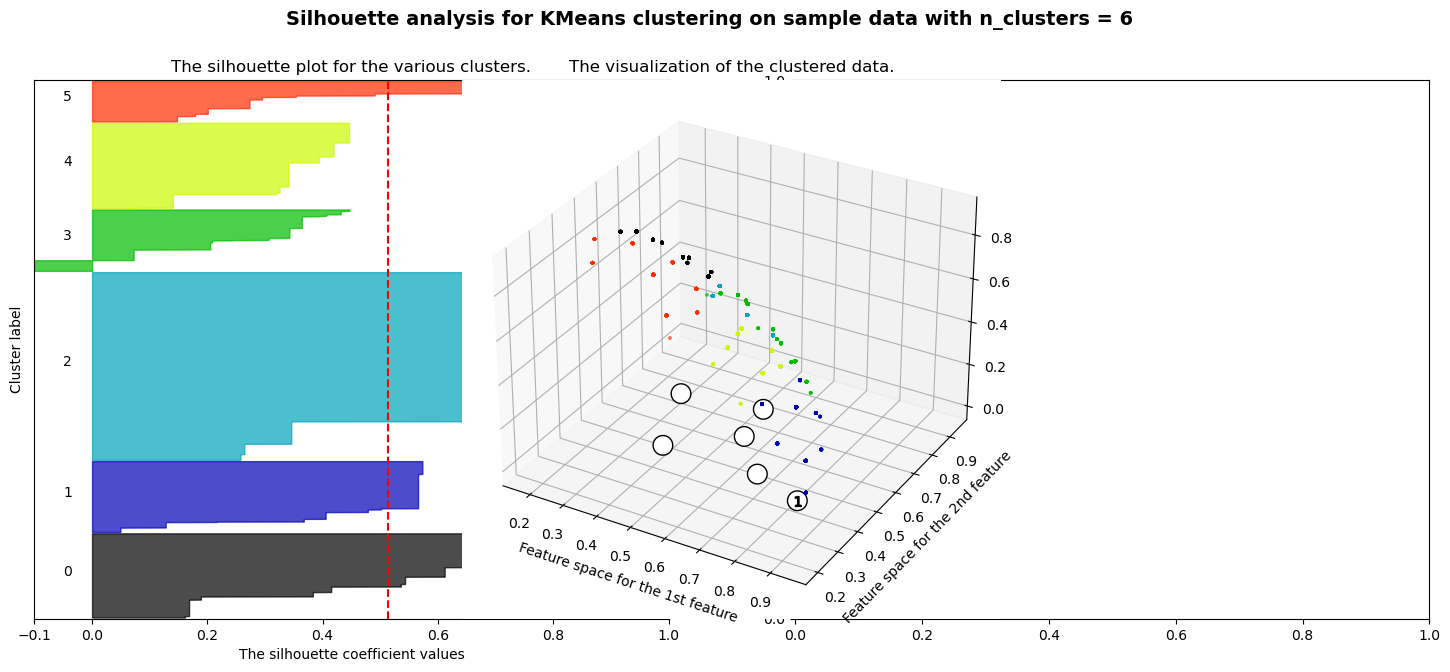

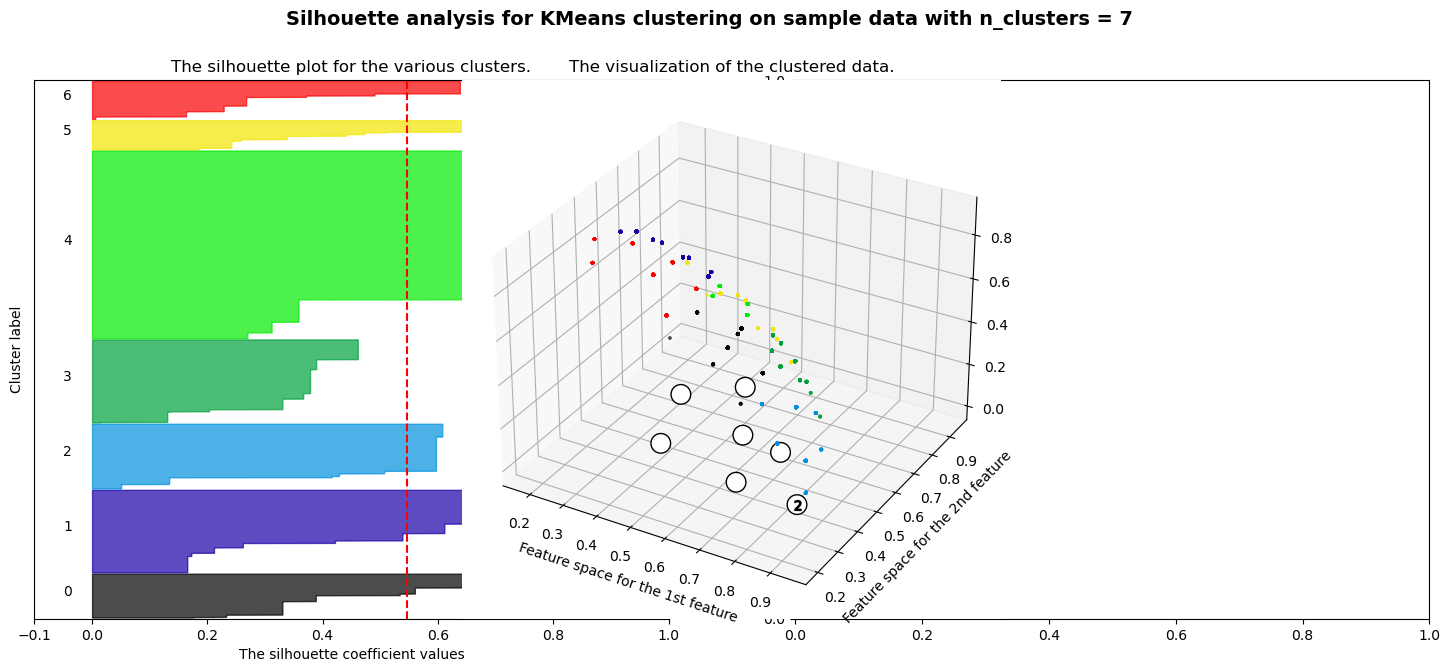

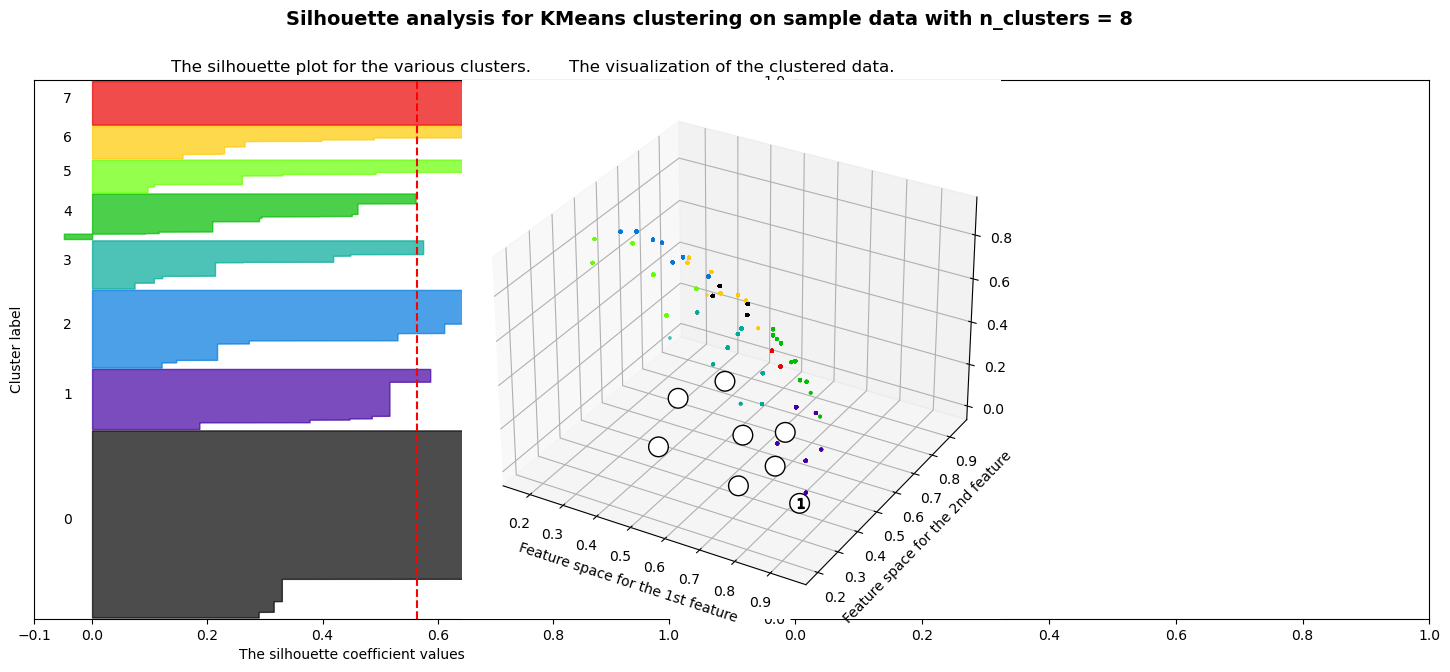

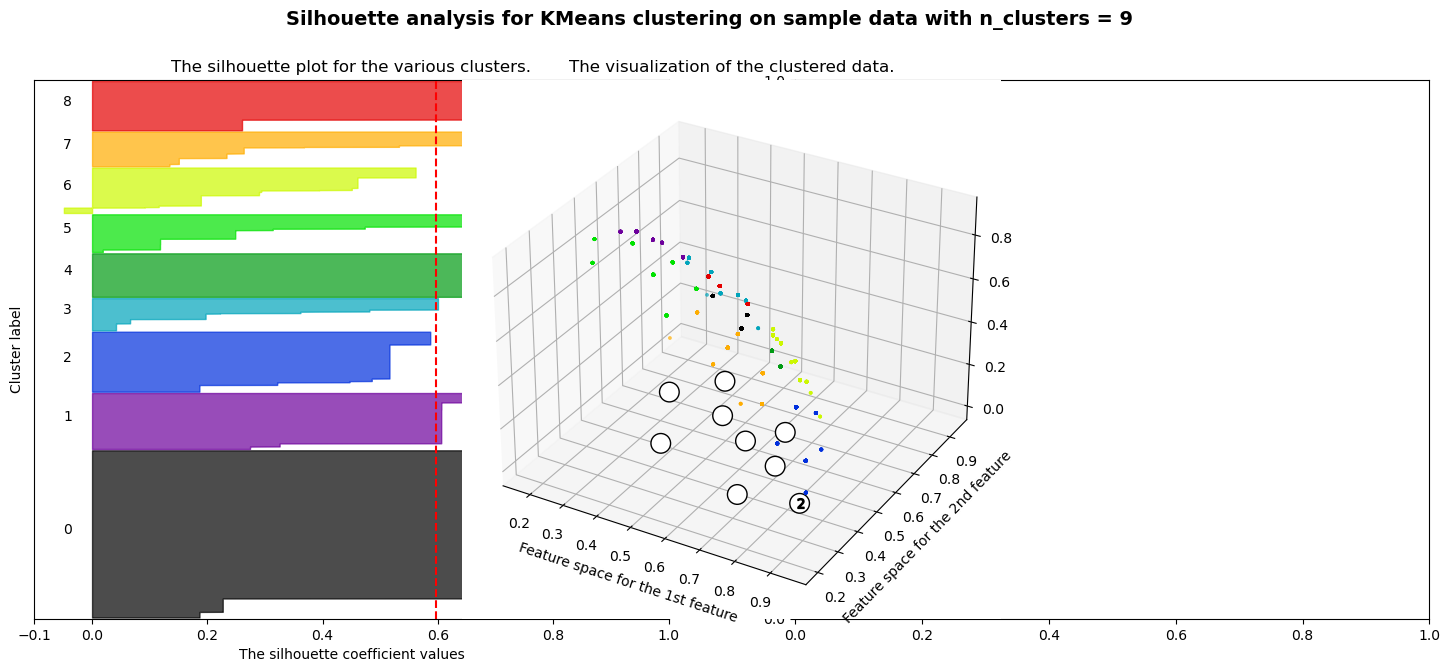

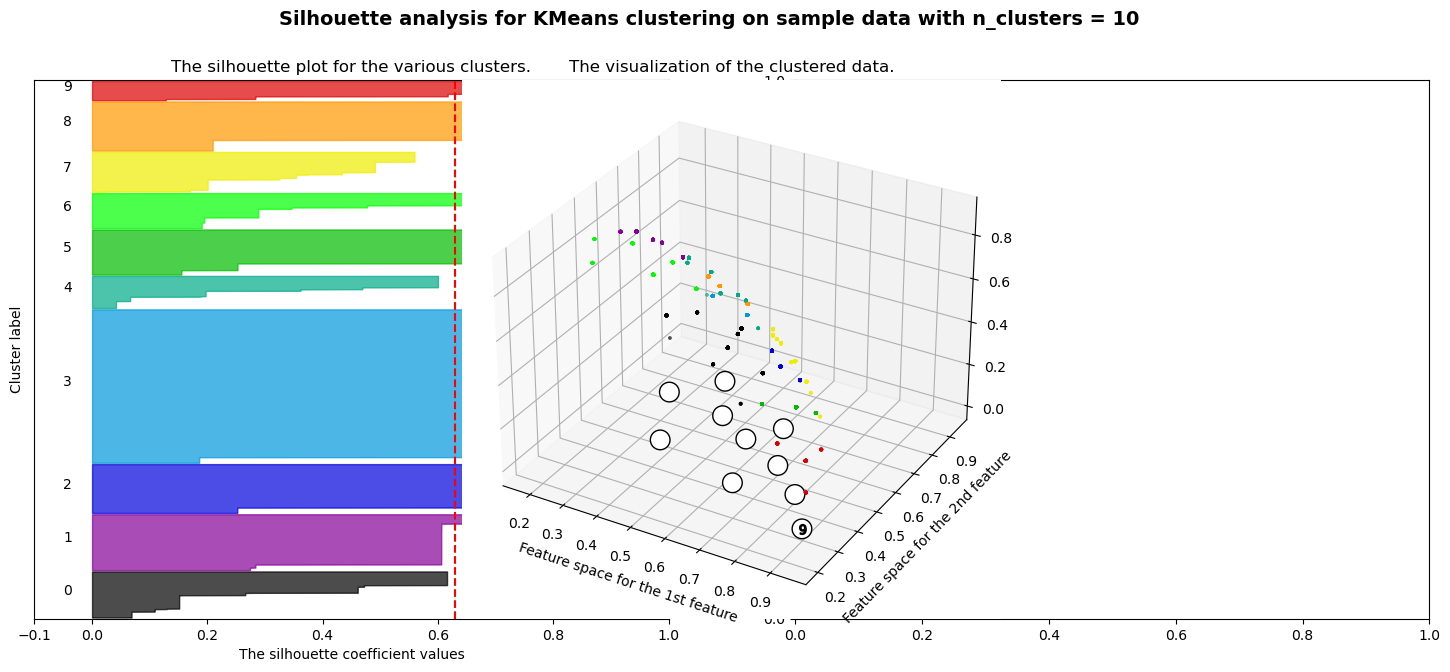

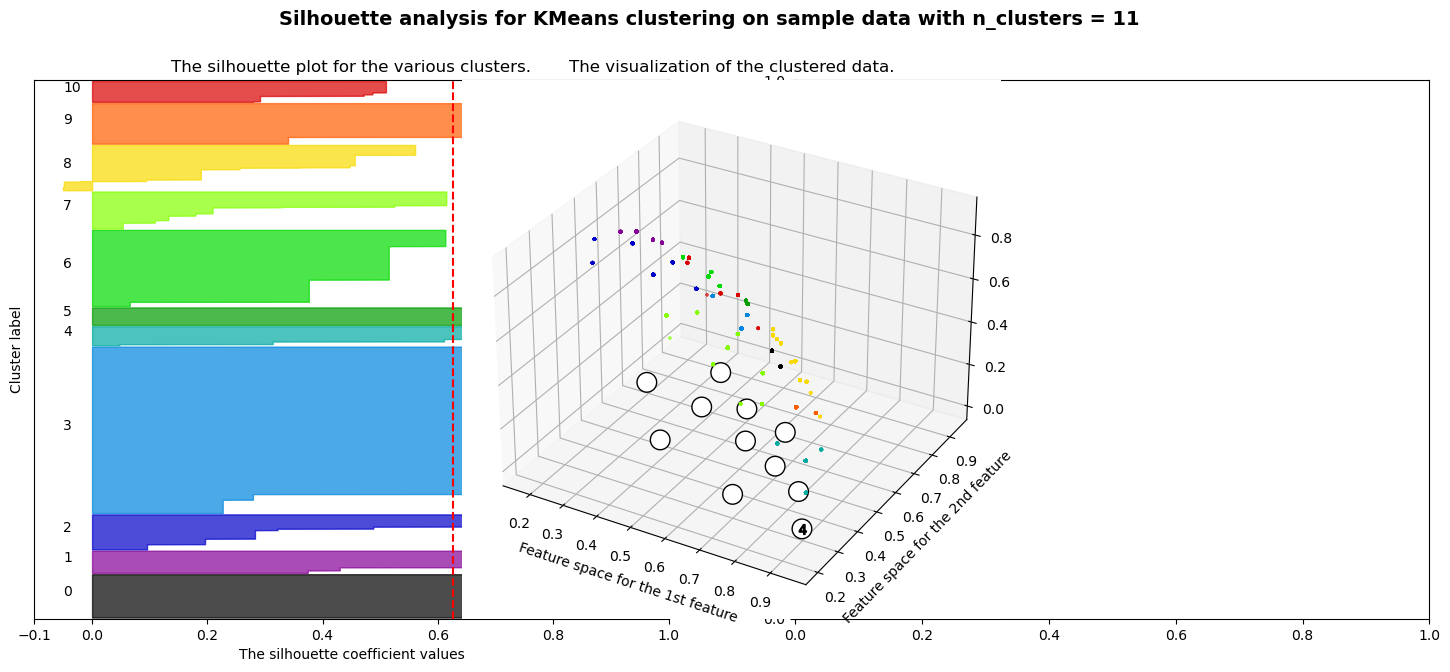

In [55]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
    ax2 = plt.axes(projection='3d')
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter3D(X[:, 0], X[:, 1],X[:,2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### From Silhoutte score  and Elbow method  the  optimum k value can be chosen as 4 


# Finding clusters for data with k=4

In [94]:
km = KMeans(n_clusters = 4, init='k-means++', max_iter=300)
km.fit(scaled_data)

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [130]:
# Assigning cluster labels for data 
labels = km.fit_predict(scaled_data)
labels

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 3, 2, ..., 1, 2, 3])

In [131]:
pd.DataFrame(labels).value_counts()
pd.DataFrame(labels).shape

(4349, 1)

In [100]:
km.labels_

array([2, 1, 2, ..., 0, 2, 1])

In [102]:
pd.DataFrame(km.labels_).value_counts()

2    1881
0    1154
3     798
1     516
dtype: int64

In [103]:
cluster_centers = km.cluster_centers_
cluster_centers

array([[3.56569887e-01, 6.16692965e-01, 6.83328735e-01, 1.00000000e+00],
       [5.33638411e-01, 7.25377299e-01, 4.03618883e-01, 2.00000000e+00],
       [5.99248841e-01, 5.37963204e-01, 5.83479174e-01, 1.77635684e-15],
       [8.04899746e-01, 4.08629426e-01, 4.06478339e-01, 3.00000000e+00]])

In [104]:
print(labels)

[2 1 2 ... 0 2 1]


In [105]:
pd.DataFrame(labels).value_counts()

2    1881
0    1154
3     798
1     516
dtype: int64

In [106]:
scaled_data['Cluster_KMeans'] =labels
scaled_data.head()

,R,F,M,Cluster_KMeans
0,0.577350,0.577350,0.577350,2
1,0.688247,0.688247,0.229416,1
2,0.577350,0.577350,0.577350,2
3,0.624695,0.624695,0.468521,2
4,0.577350,0.577350,0.577350,2


In [107]:
RFM_table['Cluster_KMeans'] = labels
RFM_table.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,Cluster_KMeans
0,2.0,4,182,553704.0,1,1,1,2
1,3.0,77,27,257404.0,3,3,1,1
2,4.0,19,72,176613.0,2,2,2,2
3,5.0,311,16,41976.0,4,4,3,2
4,6.0,37,84,151822.0,2,2,2,2


# Visualizing Clusters

In [108]:
cluster_centers

array([[3.56569887e-01, 6.16692965e-01, 6.83328735e-01, 1.00000000e+00],
       [5.33638411e-01, 7.25377299e-01, 4.03618883e-01, 2.00000000e+00],
       [5.99248841e-01, 5.37963204e-01, 5.83479174e-01, 1.77635684e-15],
       [8.04899746e-01, 4.08629426e-01, 4.06478339e-01, 3.00000000e+00]])

In [109]:
X

array([[0.57735027, 0.57735027, 0.57735027],
       [0.6882472 , 0.6882472 , 0.22941573],
       [0.57735027, 0.57735027, 0.57735027],
       ...,
       [0.17407766, 0.69631062, 0.69631062],
       [0.57735027, 0.57735027, 0.57735027],
       [0.66666667, 0.66666667, 0.33333333]])

In [110]:
cluster_centers[0][0]

0.3565698873180799

In [112]:
X[labels==0,0]

array([0.33333333, 0.17407766, 0.42640143, ..., 0.46852129, 0.46852129,
       0.17407766])

In [114]:
len(X[labels==0,0])

1154

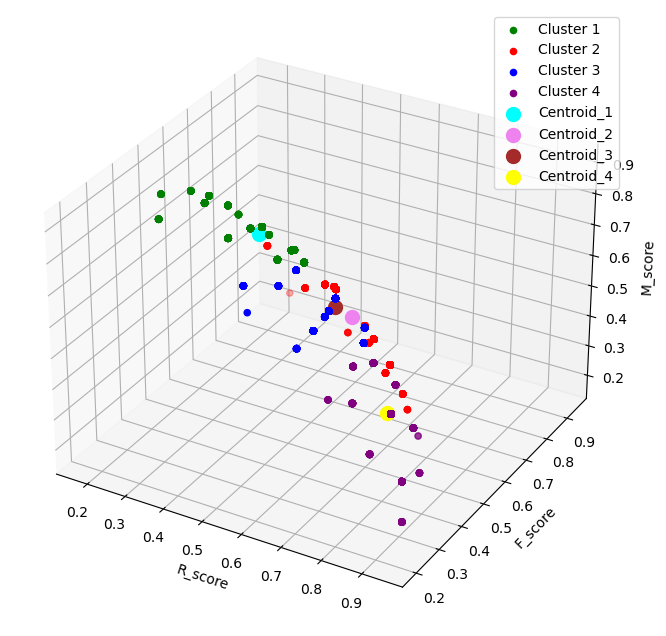

In [115]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X[labels==0,0],X[labels==0,1],X[labels==0,2],c='green',s=20,label="Cluster 1")
ax.scatter3D(X[labels==1,0],X[labels==1,1],X[labels==1,2],c='red',s=20,label="Cluster 2")
ax.scatter3D(X[labels==2,0],X[labels==2,1],X[labels==2,2],c='blue',s=20,label="Cluster 3")
ax.scatter3D(X[labels==3,0],X[labels==3,1],X[labels==3,2],c='purple',s=20,label="Cluster 4")
ax.set_xlabel("R_score")
ax.set_ylabel("F_score")
ax.set_zlabel("M_score")


# Plot centroids

ax.scatter3D(cluster_centers[0][0],cluster_centers[0][1],cluster_centers[0][2],s=100,c='cyan',label="Centroid_1")
ax.scatter3D(cluster_centers[1][0],cluster_centers[1][1],cluster_centers[1][2],s=100,c='violet',label="Centroid_2")
ax.scatter3D(cluster_centers[2][0],cluster_centers[2][1],cluster_centers[2][2],s=100,c='brown',label="Centroid_3")
ax.scatter3D(cluster_centers[3][0],cluster_centers[3][1],cluster_centers[3][2],s=100,c='yellow',label="Centroid_4")
plt.legend()



In [116]:
!pip install squarify
import squarify

In [117]:
RFM_table.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,Cluster_KMeans
0,2.0,4,182,553704.0,1,1,1,2
1,3.0,77,27,257404.0,3,3,1,1
2,4.0,19,72,176613.0,2,2,2,2
3,5.0,311,16,41976.0,4,4,3,2
4,6.0,37,84,151822.0,2,2,2,2


In [118]:
centroid_df = RFM_table.groupby('Cluster_KMeans')[['R', 'F', 'M','CustomerID']].agg({'R': 'mean', 'F': 'mean', 'M':'sum','CustomerID':'nunique'}).reset_index()
centroid_df = centroid_df.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df['Percent'] = round(centroid_df['NumBuyers']/centroid_df.NumBuyers.sum()*100,2)
centroid_df

,Cluster_KMeans,R,F,M,NumBuyers,Percent
0,0,1.690641,2.933276,3650,1154,26.53
1,1,2.327519,3.075581,910,516,11.86
2,2,2.799043,2.495481,5071,1881,43.25
3,3,3.022556,1.561404,1243,798,18.35


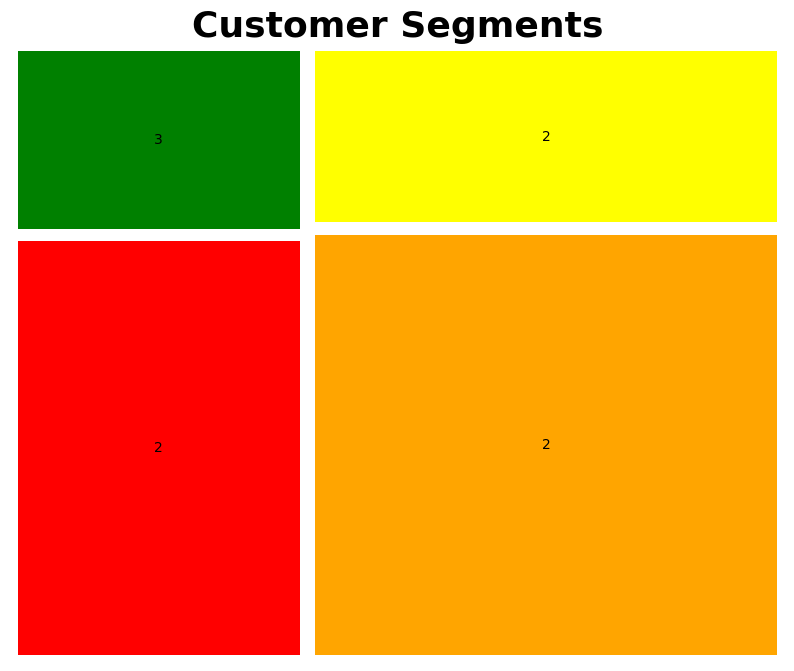

In [132]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10,8)

sizes=centroid_df['NumBuyers']
labels_1 = [f'{Cluster}\n\n{Percent} %' for Cluster,Percent in zip(centroid_df.Cluster_KMeans,centroid_df.Percent)]
color=['red','green','orange','yellow']
squarify.plot(sizes,color=color,label=labels,pad=True)

plt.title("Customer Segments", fontsize=26, fontweight="bold")

plt.axis('off')
plt.show()


In [133]:
RFM_table.to_excel('Customer_Segment.xlsx')

# Internal Index Evaluation metrics
* In this method, no ground truth labels are needed to evaluate the cluster performance
* Eg. Silhouette score , Calinski Harabazz index and Davies bouldin index etc
* Mostly it measures the similarity or dissimilarity of all clusters
* Most of the time it is calculated based on the distance 

# Model Evaluation
* https://www.geeksforgeeks.org/clustering-performance-evaluation-in-scikit-learn/
* https://heartbeat.comet.ml/how-to-evaluate-clustering-based-models-in-python-503343816db2
* https://www.kaggle.com/code/dssouvikganguly/12-evaluation-of-clustering-algorithms

### 1. Silhouette Score
* The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as a method for determining an optimal value of k (see here for more).
* It is calculated by taking the mean distance from intra-cluster and nearest cluster samples.
* Its value ranges from -1 to 1.
* A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
* 1 is the ideal value and indicates that clusters are very dense and nicely separated.
* A negative value indicates elements have likely been assigned to the wrong clusters.
* The closer the value of the silhouette score to 1 the better-separated the clusters.

About Silhouette Score
https://youtu.be/_j37uExzbXk

In [134]:
from sklearn.metrics import silhouette_samples,silhouette_score,calinski_harabasz_score,adjusted_rand_score,rand_score,davies_bouldin_score

In [135]:
ss = silhouette_score(X,km.labels_)

In [136]:
ss

0.4689936259858057

In [137]:
km.labels_

array([2, 3, 2, ..., 1, 2, 3])

### 2. Calinski Harabaz Index

https://pyshark.com/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python/

* It is also known as the Variance Ratio Criterion.
* Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
* The higher the index the more separable the clusters.

In [138]:
print(pd.DataFrame(X).shape)
print(pd.DataFrame(labels).shape)

(4349, 3)
(4349, 1)


In [139]:
calinski_harabasz_score(X,labels)

3373.3411946869173

### 3. Davies Bouldin index

https://pyshark.com/davies-bouldin-index-for-k-means-clustering-evaluation-in-python/
* The Davies–Bouldin index (DBI), introduced by David L. Davies and Donald W. Bouldin in 1979, is another metric for evaluating clustering algorithms.
* The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
* The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that produces better clusters.

In [140]:
davies_bouldin_score(X,labels)

0.8089620356851113

# Conclusion

### Based on the above evaluation scores we can conclude that our model is a decent performer.

In [142]:
RFM_table.to_excel('Students_Segment.xlsx')

# Analysis of other Clustering models

# DBSCAN Clustering

In [143]:
from sklearn.cluster import DBSCAN

In [144]:
df1 = RFM_table.iloc[:,1:4]
df1 = norm_scaler.fit_transform(df1)
df1

array([[7.22407601e-06, 3.28695459e-04, 9.99999946e-01],
       [2.99140635e-04, 1.04893470e-04, 9.99999950e-01],
       [1.07579840e-04, 4.07670973e-04, 9.99999911e-01],
       ...,
       [3.60547961e-04, 5.20791499e-04, 9.99999799e-01],
       [1.42547096e-05, 2.68701277e-03, 9.99996390e-01],
       [1.67414953e-04, 2.66341970e-04, 9.99999951e-01]])

In [145]:
# Fitting the model

In [146]:
#object=DBSCAN(eps=13,min_samples=5)
#model=object.fit(X)

#labels addresses the cluster id.
#labels=model.labels_
db_cluster = DBSCAN(eps=0.1, min_samples=2, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=2)
arr = db_cluster.fit_predict(df1)
print ("Clusters assigned are:", set(db_cluster.labels_))
dbscan_labels = db_cluster.labels_
print ("Clusters assigned are:", len(set(dbscan_labels)))




Clusters assigned are: {0, 1, 2, 3, -1}
Clusters assigned are: 5


In [147]:
print(dbscan_labels)

[0 0 0 ... 0 0 0]


In [148]:
# Identifying indexes which makes our core points

In [149]:
sample_cores=np.zeros_like(labels, dtype=bool)#sample_cores

In [150]:
sample_cores[db_cluster.core_sample_indices_]=True
sample_cores

array([ True,  True,  True, ...,  True,  True,  True])

In [151]:
#number of clusters is given by:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_clusters

4

In [152]:
RFM_table['Cluster_DBSCAN'] = dbscan_labels

In [153]:
RFM_table.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,Cluster_KMeans,Cluster_DBSCAN
0,2.0,4,182,553704.0,1,1,1,2,0
1,3.0,77,27,257404.0,3,3,1,1,0
2,4.0,19,72,176613.0,2,2,2,2,0
3,5.0,311,16,41976.0,4,4,3,2,0
4,6.0,37,84,151822.0,2,2,2,2,0


# Hierarchical Clustering

In [154]:
from sklearn.cluster import AgglomerativeClustering

In [155]:
linkage_mehtod =['single','complete','average','ward']

for l in linkage_mehtod:
    
    agg_clustering = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage=l)
    agg_clustering.fit(X)
    labels = agg_clustering.fit_predict(X)
    df_new[l] = labels
    RFM_table[l]=labels

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in ver

In [156]:
df_new.head()

,R,F,M,single,complete,average,ward
0,1,1,1,0,1,0,0
1,3,3,1,0,2,0,0
2,2,2,2,0,1,0,0
3,4,4,3,0,2,0,0
4,2,2,2,0,1,0,0


In [157]:
RFM_table.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,Cluster_KMeans,Cluster_DBSCAN,single,complete,average,ward
0,2.0,4,182,553704.0,1,1,1,2,0,0,1,0,0
1,3.0,77,27,257404.0,3,3,1,1,0,0,2,0,0
2,4.0,19,72,176613.0,2,2,2,2,0,0,1,0,0
3,5.0,311,16,41976.0,4,4,3,2,0,0,2,0,0
4,6.0,37,84,151822.0,2,2,2,2,0,0,1,0,0


# Plotting the Clusters

In [158]:
df_new_values = df_new.values
df_new_values

array([[1, 1, 1, ..., 1, 0, 0],
       [3, 3, 1, ..., 2, 0, 0],
       [2, 2, 2, ..., 1, 0, 0],
       ...,
       [1, 4, 4, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [2, 2, 1, ..., 2, 0, 0]], dtype=int64)

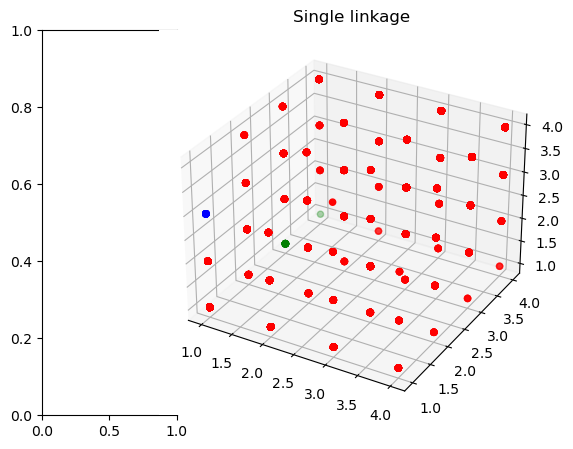

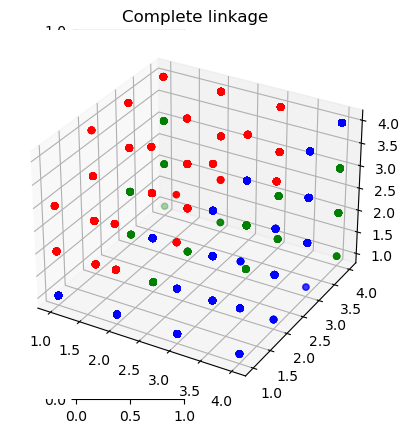

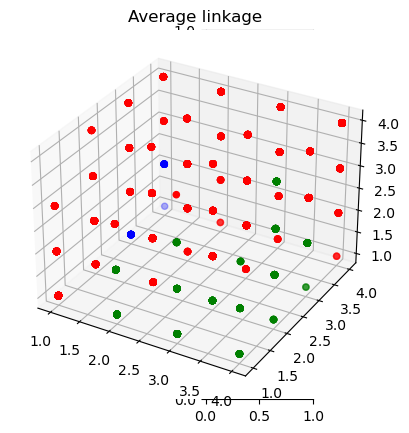

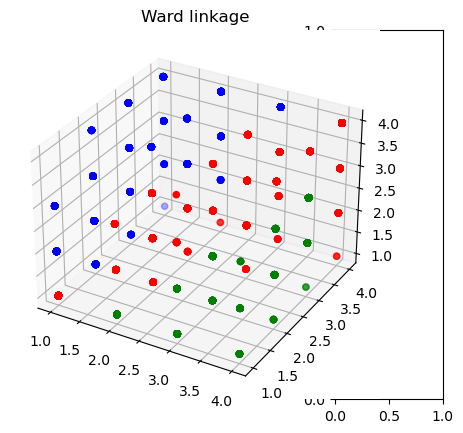

In [159]:
plt.figure(figsize=(8,5))
titles=[" ", "Single linkage","Complete linkage","Average linkage","Ward linkage"]

for i in range(1,5):
    
    plt.subplot(1,4,i)
    ax = plt.axes(projection='3d')
    ax.scatter3D(df_new_values[(df_new_values[:,i+2]==0),0],df_new_values[(df_new_values[:,i+2]==0),1],df_new_values[(df_new_values[:,i+2]==0),2],c='red',s=20)
    ax.scatter3D(df_new_values[(df_new_values[:,i+2]==1),0],df_new_values[(df_new_values[:,i+2]==1),1],df_new_values[(df_new_values[:,i+2]==1),2],c='blue',s=20)
    ax.scatter3D(df_new_values[(df_new_values[:,i+2]==2),0],df_new_values[(df_new_values[:,i+2]==2),1],df_new_values[(df_new_values[:,i+2]==2),2],c='green',s=20)
    plt.title(titles[i])
    plt.show()


# Plotting Dendrogram

In [160]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [161]:
"""#Linkage Matrix
for  l in linkage_mehtod:
    
    Z = linkage(df_new_values, method = l)
    #plotting dendrogram
    dendro = dendrogram(Z)
    plt.title(titles[i])
    plt.ylabel('Euclidean distance')
    plt.show() """

"#Linkage Matrix\nfor  l in linkage_mehtod:\n    \n    Z = linkage(df_new_values, method = l)\n    #plotting dendrogram\n    dendro = dendrogram(Z)\n    plt.title(titles[i])\n    plt.ylabel('Euclidean distance')\n    plt.show() "

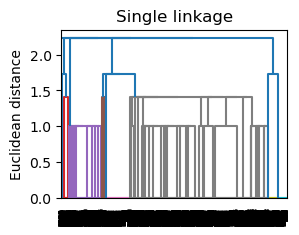

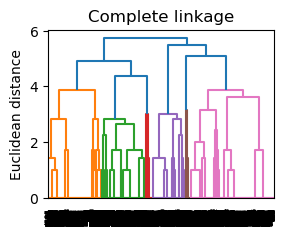

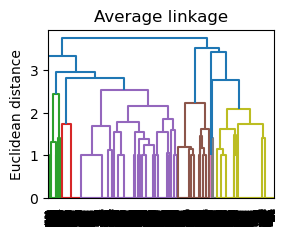

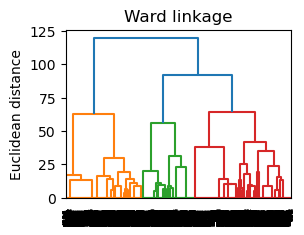

In [162]:
#Linkage Matrix
for  i in range(1,5):
    plt.subplot(2,2,i)
    Z = linkage(df_new_values, method = linkage_mehtod[i-1])
    #plotting dendrogram
    dendro = dendrogram(Z)
    plt.title(titles[i])
    plt.ylabel('Euclidean distance')
    plt.show()

# Evaluation metrics

In [163]:
df_new.head()

,R,F,M,single,complete,average,ward
0,1,1,1,0,1,0,0
1,3,3,1,0,2,0,0
2,2,2,2,0,1,0,0
3,4,4,3,0,2,0,0
4,2,2,2,0,1,0,0


In [164]:
linkage_mehtod

['single', 'complete', 'average', 'ward']

In [165]:
labels_only = df_new.iloc[:,3:]
labels_only

,single,complete,average,ward
0,0,1,0,0
1,0,2,0,0
2,0,1,0,0
3,0,2,0,0
4,0,1,0,0
...,...,...,...,...
4344,0,1,0,0
4345,0,1,0,0
4346,0,0,0,1
4347,0,1,0,0


In [166]:
ss = {}
ch = {}
dbs = {}
ars = {}
rs = {}
for l in range(0,len(linkage_mehtod)):
    ss[linkage_mehtod[l]] = round(silhouette_score(X,df_new.iloc[:,i]),2)
    ch[linkage_mehtod[l]] = round(calinski_harabasz_score(X,df_new.iloc[:,i]),2)
    dbs[linkage_mehtod[l]] = round(davies_bouldin_score(X,df_new.iloc[:,i]),2)
    #ars[linkage_mehtod[l]] = round(adjusted_rand_score(X,df_new.iloc[:,i]),2)
    #rs[linkage_mehtod[l]] = round(rand_score(X,df_new.iloc[:,i]),2)



print(f"Silhouette Score: {ss}")
print(f"Calinski Harabasz Score: {ch}")
print(f"Davies Bouldin Score: {dbs}")
"""calinski_harabasz_score(X,y_kmeans)
davies_bouldin_score(X,y_kmeans)
ars = adjusted_rand_score(y_kmeans,km.labels_)
rs = rand_score(y_kmeans,km.labels_) """


Silhouette Score: {'single': 0.33, 'complete': 0.33, 'average': 0.33, 'ward': 0.33}
Calinski Harabasz Score: {'single': 1436.14, 'complete': 1436.14, 'average': 1436.14, 'ward': 1436.14}
Davies Bouldin Score: {'single': 1.27, 'complete': 1.27, 'average': 1.27, 'ward': 1.27}


'calinski_harabasz_score(X,y_kmeans)\ndavies_bouldin_score(X,y_kmeans)\nars = adjusted_rand_score(y_kmeans,km.labels_)\nrs = rand_score(y_kmeans,km.labels_) '

# External Index Evaluation metrics
* USed when ground truth labels are known
* Eg. Rand Index score and Adjusted Rand index score
* To calculate both RI and ARI ,  actual (ground truth) labels are  compared with predicted labels and index is calculated

# Rand score
https://youtu.be/lIUcs9n5mVQ

* can only be used when we know the labels and test the predicted labels against the known labels
* Since we dont know the labels in our dataset it cannot be calculated
* However it can be used to compare the labels of two different algorithms
* Here we are comparing the labels of KMeans and Hierarchical (Ward linkage) method

In [167]:
rs = rand_score(RFM_table['Cluster_KMeans'],RFM_table['ward'])
rs

0.8353975567351185

# Adjusted Rand Score

In [168]:
ars = adjusted_rand_score(RFM_table['Cluster_KMeans'],RFM_table['ward'])
ars

0.6345933090871275